In [107]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
#df = pd.read_csv('/Users/masha/DSSG/project-inspector-gadget/Data/Building_Violations.csv')
df = pd.read_csv('/Users/masha/DSSG/project-inspector-gadget/Data/Building_Violations_sample_50000.csv')

//anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [11]:
import re

def spaces_to_snake(column_name):
    s = re.sub(r"\s+",'_', column_name)
    return s.lower()
    
df.columns = [spaces_to_snake(col) for col in df.columns]

In [12]:
df.violation_date = pd.to_datetime(df.violation_date)

In [17]:
#look at types of violation codes and how many there are of each kind
violation_grouped = df.groupby('violation_code')
violation_grouped = grouped.count()

,unnamed:_0,id,violation_last_modified_date,violation_date,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,inspection_status,inspection_waived,inspection_category,department_bureau,address,property_group,ssa,latitude,longitude,location
violation_code,,,,,,,,,,,,,,,,,,,,,
020008,1,1,1,1,1,1,0,0,1,0,...,1,1,1,1,1,1,0,1,1,1
190019,25,25,25,25,25,10,25,0,18,0,...,25,25,25,25,25,25,6,25,25,25
199029,561,561,561,561,561,259,561,9,554,0,...,561,561,561,561,561,561,150,561,561,561
BR1000,13,13,13,13,13,11,13,0,1,13,...,13,13,13,13,13,13,4,13,13,13
BR1001,239,239,239,239,239,170,239,0,0,239,...,239,239,239,239,239,239,41,238,238,238
BR1010,10,10,10,10,10,6,10,0,10,10,...,10,10,10,10,10,10,2,10,10,10
BR1023,1,1,1,1,1,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
BR1024,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
BR1041,6,6,6,6,6,3,6,0,3,6,...,6,6,6,6,6,6,1,6,6,6


In [58]:
#make a column for years, for easy time series plotting
df['year'] = df.violation_date.apply(lambda x: x.year)

In [36]:
df.head()
df.tail()

,unnamed:_0,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,...,inspection_waived,inspection_category,department_bureau,address,property_group,ssa,latitude,longitude,location,year
49995,49995,1438713,06/16/2006,2006-01-01,CN063014,OPEN,NaN,CHIMNEY,NaN,CHIMNEY WASHED OUT MORTAR LOOSE BRICKS.,...,N,PERIODIC,CONSERVATION,1854 E 79TH ST,20597,50,41.751683,-87.578659,"(41.75168267214598,-87.57865870399478)",2006
49996,49996,1357061,07/17/2006,2006-01-01,CN070024,OPEN,NaN,REPAIR PORCH SYSTEM,NaN,"35 REAR PORCH GRADE TO 3RD RAILS TOO SHORT, MI...",...,N,PERIODIC,CONSERVATION,31 N LOREL AVE,1612,NaN,41.881299,-87.758621,"(41.881299199557894,-87.75862053499047)",2006
49997,49997,1430847,10/14/2008,2006-01-01,CN031013,COMPLIED,07/10/2008,"FIRE EXTNGSHR REQ, RESDNTL",NaN,ALL ELEVATION MISSING FIRE EXTINGUISHER,...,N,PERIODIC,CONSERVATION,6501 S LOWE AVE,19693,NaN,41.776074,-87.640625,"(41.7760739361563,-87.64062455203374)",2006
49998,49998,1734149,09/16/2008,2006-01-01,CN135016,COMPLIED,09/05/2008,MICE/RODENTS,NaN,MICE ON PREMISES,...,N,PERIODIC,CONSERVATION,4836 S INDIANA AVE,18261,NaN,41.806381,-87.621283,"(41.80638088214982,-87.62128295874425)",2006
49999,49999,1834762,01/12/2007,2006-01-01,CN190019,COMPLIED,01/11/2007,ARRANGE PREMISE INSPECTION,NaN,NO ENTRY TO INTERIOR TO VERIFY OCCUPANCY AND D...,...,N,PERIODIC,CONSERVATION,200 N KOSTNER AVE,1531,NaN,41.883310,-87.735709,"(41.88330951242491,-87.73570901056128)",2006


In [61]:
#number of inspections by year
year_grouped = df.groupby('year').count()

year_grouped

,unnamed:_0,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,...,inspection_status,inspection_waived,inspection_category,department_bureau,address,property_group,ssa,latitude,longitude,location
year,,,,,,,,,,,,,,,,,,,,,
2006,6660,6660,6660,6660,6660,6660,1948,6618,240,6418,...,6660,6660,6660,6660,6660,6660,1325,6654,6654,6654
2007,5915,5915,5915,5915,5915,5915,1719,5843,147,5696,...,5915,5915,5915,5915,5915,5915,1048,5911,5911,5911
2008,6647,6647,6647,6647,6647,6647,1986,6572,817,6281,...,6647,6647,6647,6647,6647,6647,1270,6641,6641,6641
2009,5919,5919,5919,5919,5919,5919,1712,5883,2179,5114,...,5919,5919,5919,5919,5919,5919,1184,5904,5904,5904
2010,4836,4836,4836,4836,4836,4836,1507,4818,2881,4269,...,4836,4836,4836,4836,4836,4836,937,4831,4831,4831
2011,5172,5172,5172,5172,5172,5172,1683,5141,3164,4446,...,5172,5172,5172,5172,5172,5172,950,5171,5171,5171
2012,4790,4790,4790,4790,4790,4790,1368,4754,2812,4180,...,4790,4790,4790,4790,4790,4790,885,4786,4786,4786
2013,3951,3951,3951,3951,3951,3951,923,3928,1844,3189,...,3951,3951,3951,3951,3951,3951,704,3949,3949,3949
2014,4575,4575,4575,4575,4575,4575,593,4538,2492,3811,...,4575,4575,4575,4575,4575,4575,792,4573,4573,4573


In [78]:
# break it into status types
grouped_by_year_and_status = df.groupby(['year', 'inspection_status']).count()
grouped_by_year_and_status['id']

year  inspection_status
2006  CLOSED                536
      FAILED               5127
      PASSED                997
2007  CLOSED                282
      FAILED               4669
      HOLD                    3
      PASSED                961
2008  CLOSED                241
      FAILED               5571
      PASSED                835
2009  CLOSED                390
      FAILED               4829
      HOLD                    1
      PASSED                699
2010  CLOSED                524
      FAILED               3660
      PASSED                652
2011  CLOSED                818
      FAILED               3627
      PASSED                727
2012  CLOSED                670
      FAILED               3558
      PASSED                562
2013  CLOSED                758
      FAILED               2649
      PASSED                544
2014  CLOSED                764
      FAILED               3417
      PASSED                394
2015  CLOSED                216
      FAILED    

In [97]:
#unstack for plotting purposes
unstacked_year_status = grouped_by_year_and_status['id'].unstack()
unstacked_year_status

inspection_status,CLOSED,FAILED,HOLD,PASSED
year,,,,
2006,536,5127,NaN,997
2007,282,4669,3,961
2008,241,5571,NaN,835
2009,390,4829,1,699
2010,524,3660,NaN,652
2011,818,3627,NaN,727
2012,670,3558,NaN,562
2013,758,2649,NaN,544
2014,764,3417,NaN,394


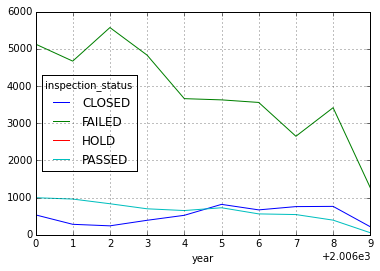

In [83]:
#plot over time
unstacked_year_status.plot()

In [109]:
#now group by violation code type

grouped_by_year_and_status_and_violation_code = df.groupby(['year', 'inspection_status', 'violation_code']).count()
counts_by_year_status_code = grouped_by_year_and_status_and_violation_code['id']

# filter out the codes with single violations because we're interested in the repeated codes
counts_by_year_status_code_over_1 = counts_by_year_status_code[counts_by_year_status_code >1]
counts_by_year_status_code_over_1

year  inspection_status  violation_code
2006  CLOSED             199029            22
                         BR1000             3
                         BR1001            15
                         BR2010             7
                         BR2080            12
                         BR3057             4
                         BR3058             4
                         CN014012           2
                         CN015012           4
                         CN015062           9
                         CN017012           2
                         CN041063           3
                         CN061014          13
                         CN061034           9
                         CN062014           2
                         CN062024           4
                         CN062034           2
                         CN063014           5
                         CN063024           2
                         CN065014           2
                         CN065034       

In [116]:
# group by building ID and inspection status, find the worst buildings

building_and_status = df.groupby(['location', 'inspection_status']).count()